<a href="https://colab.research.google.com/github/phutaekwondo/CS114.L21/blob/main/BT_colab_so_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
url_train = 'http://cs.uit.edu.vn/data2.txt?fbclid=IwAR11i7MdMWgqg6i1ab0z3C1VRJLM_6BpnjlpS_hZmNhlBJeYjDihp479fnU'
url_test_1 = 'http://cs.uit.edu.vn/data3.txt?fbclid=IwAR0xQwlnCNoEWthoc8txwpYSHFuf-lo6KOAXMzum53EWy89fJChAaUqGzB8'
url_test_2 = 'http://cs.uit.edu.vn/data4.txt?fbclid=IwAR0fXuM2Q29pRBldP-sv9znzwYQCRCGe-VHLSvGeUcrvhkFR2UhxtCddIZQ'

In [ ]:
data_train = pd.read_csv(url_train, header=None, names = ['x', 'y'])
x = data_train['x']
y = data_train['y']
print(max(x))

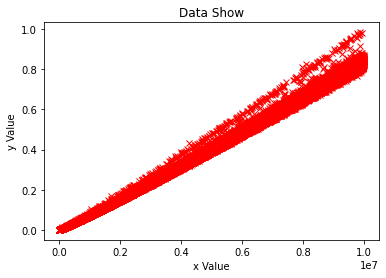

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x, y, "x", color='red')
plt.title("Data Show")
plt.xlabel('x Value')
plt.ylabel('y Value')
plt.show()

Dữ liệu như thế này thì ta dùng Linear Regression

h(x) = Theta^T * X

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
X_train = np.array(x).reshape(-1,1)
y_train = np.array(y)

[[6083695]
 [1954367]
 [3734185]
 ...
 [9837364]
 [9466593]
 [4080801]]


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Theta_0: ', model.coef_)
print('Theta_1: ', model.intercept_)

Theta_0:  [8.45569856e-08]
Theta_1:  -0.015895527000496013


In [ ]:
data_test_1 = pd.read_csv(url_test_1, header=None, names = ['x', 'y'])
X_test_1, y_test_1 = np.array(data_test['x']).reshape(-1,1), np.array(data_test['y'])

In [ ]:
estimated = model.predict(X_test_1)
print(estimated)

[3.18353889 3.14613375 3.07980564 ... 2.81848194 1.78037084 1.79197375]


In [ ]:
def MSE(estimates, y_test):
  result = 0
  for estimate, y in zip(estimates, y_test):
    result += (estimate - y) ** 2
  temp = 2 * len(estimates)
  result = (1/temp) * result
  return result

In [ ]:
est = model.predict(X_train)
print(MSE(est, y_train))

7.168864360874435e-05
